In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621854 sha256=02fe94c2233eee63506a0fa20663de1d1863b0275537d728cc8774a7197eaaa4
  Stored in directory: c:\users\simran\appdata\local\pip\cache\wheels\da\03\6e\62a48359ab630e39939dbb392cc079923bb77664e97a47645d
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import pandas as pd 
from autocorrect import Speller
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
spell = Speller()
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('E:\Self Study\PyDeveploper Ashish projects\Spam-Classifier-using-naive-bayes-main\Spam-Classifier-using-naive-bayes-main\spam.csv')

In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace = True)

In [13]:
df.rename(columns = {'v1':"labels",'v2':"messages"},inplace = True)

In [14]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Visualizing SPAM Words 

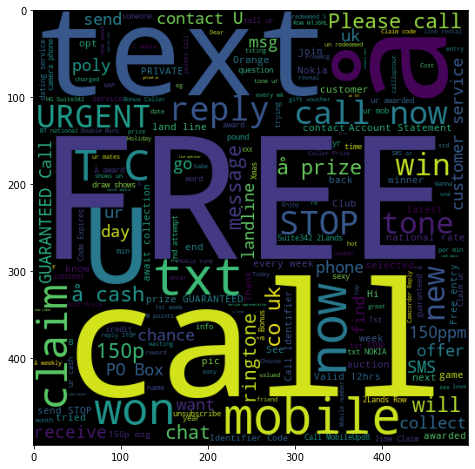

In [15]:
spamwords = ' '.join(list(df[df['labels']=='spam']['messages']))
wordcloudplot = WordCloud(width = 500, height = 500).generate(spamwords) 
plt.figure(figsize = (10,8))
plt.imshow(wordcloudplot)
plt.show()

# Visualizing SPAM Words 

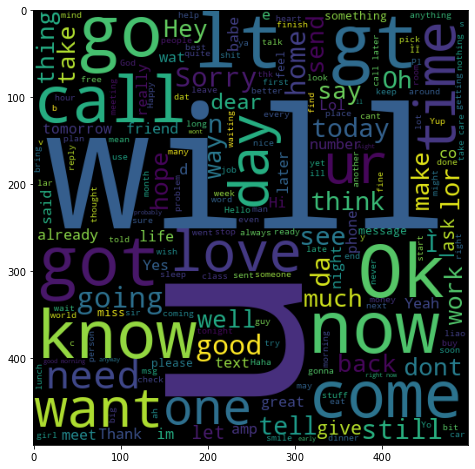

In [16]:
spamwords = ' '.join(list(df[df['labels']=='ham']['messages']))
wordcloudplot = WordCloud(width = 500, height = 500).generate(spamwords) 
plt.figure(figsize = (10,8))
plt.imshow(wordcloudplot)
plt.show()

# Preprocessing the Data

# 
- Removing  Non Alphabetic Characters
- Lowercase messages
- Tokenization
- Remove Stop-Words drop it 
- Steming / Lemitization
- Spell Correction

In [9]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Stemming in NLP -> convert words to root words for ex: playing,played,plays ==> play 
#drawback machine -> machin  | movie -> movi 
# IN this case Lemitization is better but little complicated so here we r using stemming

In [19]:
df.shape

(5572, 2)

In [33]:
#Encoding Labels : Ham = 0 Spam = 1
df['labels'] = df['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [36]:
new_data = []
for i in tqdm(range(df.shape[0])):              #shape[0] means change in rows 
    lines = df.iloc[i,1]   #iloc[i,1] means for every row first columns means the messages column rows.
    lines = re.sub('[^A-Za-z]',' ',lines) #removing non alphabetic characters
    lines = lines.lower()   #Lower format of words
    tokenized_line = word_tokenize(lines)     # Tokenization 
     #Removing Stop words (stopwords should be removed because it doesnt make sense),Stemming ,and Spell Correction
    processed_lines = []
    for i in tokenized_line:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
    final_lines = ' '.join(processed_lines)  #all list with be converted to string
    new_data.append(final_lines)

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [04:12<00:00, 22.05it/s]


In [37]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [26]:
lines

'rofl  its true to its name'

In [28]:
processed_lines

['rofl', 'true', 'name']

In [29]:
tokenized_line

['rofl', 'its', 'true', 'to', 'its', 'name']

In [35]:
Y = df['labels']

In [64]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# Splitting the Data into Training and Testing


In [43]:
X_train ,X_test, y_train,y_test = train_test_split(new_data,Y, test_size = 0.2)

In [50]:
print("X train :",len(X_train),"Y train :",y_train.shape,"X test:",len(X_test),"Y test : ",y_test.shape)

X train : 4457 Y train : (4457,) X test: 1115 Y test :  (1115,)


In [55]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
mat = CountVectorizer()   #bag of words

In [57]:
x_train_vec = mat.fit_transform(X_train).toarray()
x_test_vec = mat.transform(X_test).toarray()


In [58]:
x_train_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Model Train : Naive Bayes Model

In [60]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [62]:
model.fit(x_train_vec,y_train)

GaussianNB()

In [65]:
model.classes_

array([0, 1], dtype=int64)

In [63]:
model.class_count_    #to check number of 0 and 1

array([3857.,  600.])

In [68]:
Y_pred = model.predict(x_test_vec)

In [69]:
Y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [67]:
y_test

1053    0
3918    0
246     0
702     0
17      0
       ..
3138    0
3986    1
4269    0
5086    0
3546    1
Name: labels, Length: 1115, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [72]:
accuracy_score(y_test,Y_pred)*100

87.08520179372198

In [73]:
confusion_matrix(y_test,Y_pred) # Can be improved using Hyper-Parameter Tunning

array([[840, 128],
       [ 16, 131]], dtype=int64)